# Freshwater fluxes in Sognefjord
 
 Course :    GEOF105<br>
 Credits: Kjersti Daae<br>

## 2 Freshwater fluxes in Sognefjord (seasonal)

In [9]:
#Import necessary python libraries
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
# to install latest release using pip:
# >> pip install pandas
# or
# if using a Conda package (on 'base' or other virtual environment):
# >> conda install pandas

import glob
# if not yet install, find out how to do it online (exercise!)

In [10]:
'''
Do not make changes in this cell 
'''
folder="./Data/"        # path to the data folder. Dot (.) at the start means we start the path from the folder where this notebook is
fname="precip_sogn.csv" #file name
P_tmp = pd.read_csv(folder+fname, header=0,sep=';',decimal=',')           # read the data into a preliminary dataframe
P_tmp.index =  pd.to_datetime(P_tmp['Tid(norsk normaltid)'],format='%m.%Y')   # set time index as the main index of the dataframe
P_tmp.index.name = 'Time'                                                 # Rename the time index

#Extract one temporary dataframe from each station
YtreSolund =P_tmp.loc[P_tmp['Navn'] == 'Ytre Solund']
Vangsnes =P_tmp.loc[P_tmp['Navn'] == 'Vangsnes']
Skjolden =P_tmp.loc[P_tmp['Navn'] == 'Skjolden']

#Combine all data into a dataframe with one column per station
P=pd.DataFrame(index=P_tmp.index[0:12])
P['YtreSolund'] = YtreSolund['Nedbør (mnd)']
P['Vangsnes'] = Vangsnes['Nedbør (mnd)']
P['Skjolden'] = Skjolden['Nedbør (mnd)']

# Calculate the mean of the three stations and add as a column to the dataframe
P['Mean'] = P.mean(axis=1)

# Instead of writing up all filenames and read one by one, we can use 'glob' to list all the files in the directory. 
# Then we can make a for-loop to read each file
files=glob.glob("./Data/Rivers/*.csv")

for i,fname in enumerate(files):
    #The filename contain the staion name. We want to separate out the station name by using the split function twice (easy option)
    namesplit1=fname.split('-')
    namesplit2=namesplit1[-1].split('.')
    station_name=namesplit2[0]

    R = pd.read_csv(fname, header=1,sep=';',decimal=',')
    R.index =  pd.to_datetime(R['Tidspunkt'],format='%Y-%m-%d %H:%M:%SZ')
    R.index.name = 'Time'
    
    if i<1:
        River_day=pd.DataFrame(index=R.index)
        River_day[station_name] = R['Vannføring (m³/s)']
    else:
        River_day[station_name] = R['Vannføring (m³/s)']
    
#2) 
# We can now make monthly means by resampling the dataframe. 
# To choose monthly means, we indicate 'M' in the resample function
FR=River_day.resample('M').mean()

#3)
#Sum the river discharges into a separate column
FR['Total'] = FR.sum(axis=1)


In [13]:
#assign constants for fjord dimensions
fjord_width=4500                    #unit m - average width
fjord_length=250000                 #unit m - total length (main fjord + side fjords)
fjord_area=fjord_width*fjord_length #unit m^2 (rough estimate)

# Convert alle the data into fluxes.
FP_tmp=P/(1000*30*24*60*60)*fjord_area
FP=FP_tmp.resample('M').mean()

mean_FR=FR["Total"].mean()
mean_FP=FP["Mean"].mean()

FR_sealevel=mean_FR*(60*60*24*365)/fjord_area
FP_sealevel=mean_FP*(60*60*24*365)/fjord_area

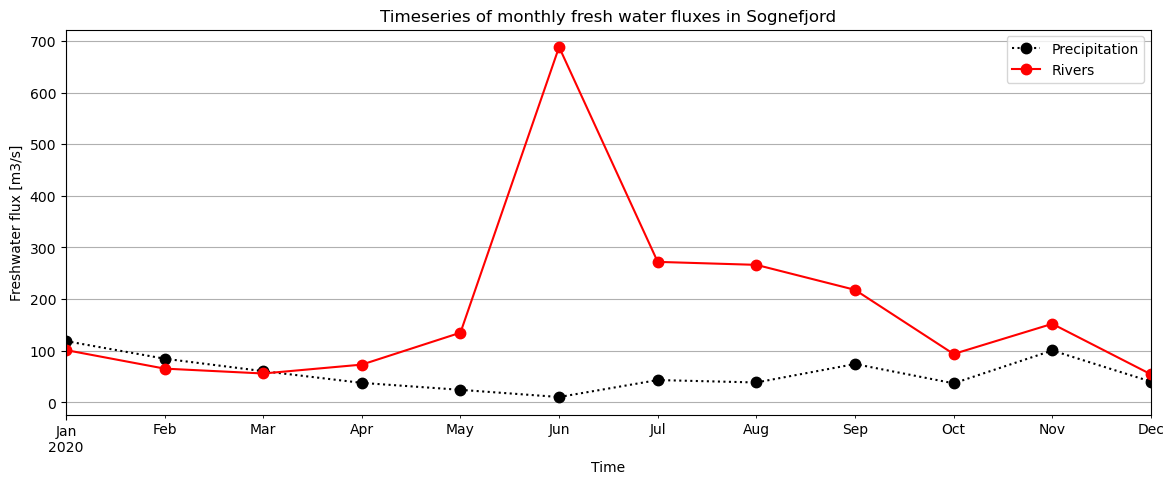

In [25]:
fig, axs = plt.subplots( figsize=(14,5) )
FP.plot(y='Mean', style='.:', markersize=15, label='Precipitation', ax=axs, color='black')
FR.plot(y='Total', style='.-', markersize=15, label='Rivers', ax=axs, color='red')

axs.set_title('Timeseries of monthly fresh water fluxes in Sognefjord')
axs.set_ylabel('Freshwater flux [m3/s]')
axs.grid()

# add colours to plots: plt.plot(..., color={'green' or 'red' or 'blue' or 'pink' or 'yellow' or 'black' etc.})

In [ ]:
test